# GoBike Data Exploration

## Explaining the data

How is duration related to user type, month and day?

import the data

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
#sb.set_style("darkgrid") #to make the charts look nicer

%matplotlib inline

load and join the data.
Which variables are useful to carry into the bivariate analysis?

In [3]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

#### Overview of initial exploration: structures and features

This analysis is based on the Ford GoBike dataset from 2017 which can be accessed from here: https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub?embedded=True. 

It comprises 519700 entries across 13 columns. Variables include time-related features like ride duration, start time and end time, position-related features like start station name and latitude, plus information about the type of user, as well as bike and station IDs.

For this analysis, the most important features are likely to be duration, user type, and start time.

## Univariate analysis

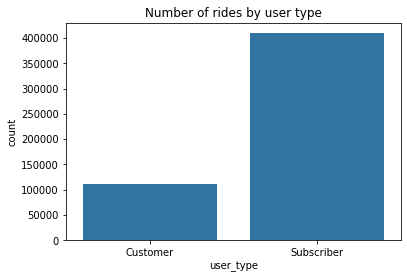

In [7]:
#user type

base_colour = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = base_colour).set(title='Number of rides by user type');

There are many more journeys by subscribers than customers

In [8]:
#duration

np.mean(df.duration_sec/60)
#average length of ride is a little over 18 minutes.

18.31682534795735

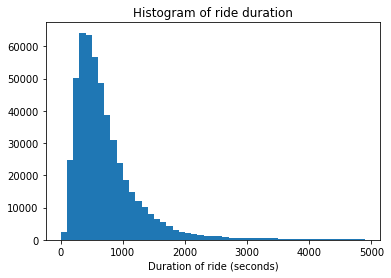

In [9]:
bins_edges_duration = np.arange(0, 5000, 100)
plt.hist(data = df, x ='duration_sec', bins = bins_edges_duration);
plt.xlabel('Duration of ride (seconds)')
plt.title('Histogram of ride duration');

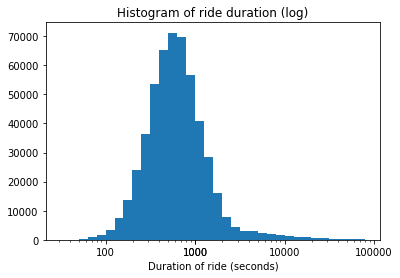

In [10]:
#log transformation because very skewed to the right

np.log10(df['duration_sec'].describe()) #up to 5

bin_edges = 10 ** np.arange(1.5, 5, .1)
ticks = [100, 1000, 1000, 10000, 100000] #course notes
names = ['{}'.format(v) for v in ticks] #formating blank. from course solutions doc (scales and transformations). For loop. v is placeholder for item in ticks above. 

plt.hist(data = df, x = 'duration_sec', bins = bin_edges)

plt.xscale('log')
plt.xlabel('Duration of ride (seconds)')
plt.xticks(ticks, names)
plt.title('Histogram of ride duration (log)');

Duration typically lasts between about 50 seconds and 10000 seconds, with a peak before 1000 seconds or about 16 minutes. The plot is unimodal.

In [12]:
#convert start_time to datetime, then create columns for day and month
#https://knowledge.udacity.com/questions/179434

df['start_time'] = pd.to_datetime(df.start_time)

df['day'] = df.start_time.dt.strftime("%A")
df['month'] = df.start_time.dt.strftime('%B')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,day,month
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,Sunday,December
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,Sunday,December
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,Sunday,December
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,Sunday,December
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,Sunday,December


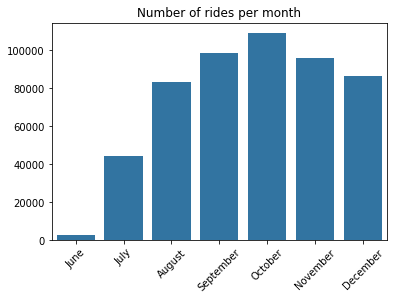

In [13]:
#examine number of rides by month
#change order https://seaborn.pydata.org/generated/seaborn.countplot.html

sb.countplot(data = df, x = 'month', color = base_colour, order=['June', 'July', 'August', 'September', 'October', 'November', 'December']).set(title='Number of rides per month');
plt.xticks(rotation=45)
plt.ylabel('')
plt.xlabel('');

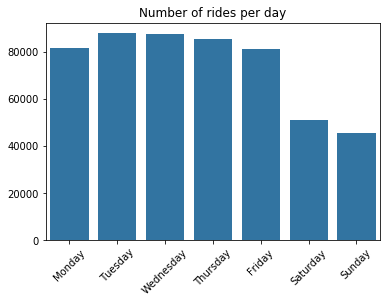

In [14]:
#and day
sb.countplot(data = df, x = 'day', color = base_colour, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).set(title='Number of rides per day')
plt.xticks(rotation=45)
plt.ylabel('')
plt.xlabel('');

Fewer rides happen on the weekend compared to weekdays. June and July are unpopular. These are the reverse to what we might expect. Perhaps this is due to data collection. Also could be because there are lots of commuters using the bikes.

#### Overview of univariate analysis

There are many more journeys by subscribers than customers.

Duration typically lasts between about 50 seconds and 10000 seconds, with a peak before 1000 seconds or about 16 minutes. The plot is unimodal and a log transformation was made because the original plot was highly skewed to the right.

There is a big difference in number of rides starting from the most popular start point compared to the 20th most popular. Maybe tourist hotspots. Could be interesting to look at duration depending on start point. Might expect rides from tourist hotspots to have short durations as people get on and off to see the sights, and to be seasonal.

Fewer rides happen on the weekend compared to weekdays. June and July are unpopular. These are the reverse to what we might expect. Perhaps this is due to data collection.

## Bivariate analysis

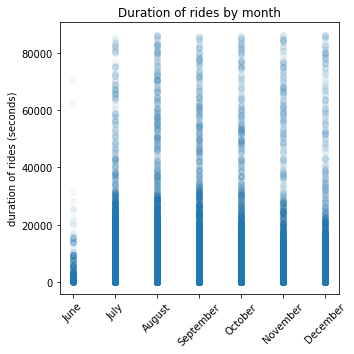

In [16]:
#look at duration by month

plt.figure(figsize = [5, 5])
plt.scatter(data = df, x = 'month', y = 'duration_sec', alpha = 0.05) #alpha for transparency
plt.title('Duration of rides by month')
plt.xlabel('')
plt.ylabel('duration of rides (seconds)')
plt.xticks(rotation=45)
ax = plt.gca() #https://stackoverflow.com/questions/47492783/how-to-stop-pyplot-from-reversing-the-values-in-my-x-axis
ax.invert_xaxis();

Longer rides appear to be more common in August and September. This makes sense as the weather is likely to be good. Unexpected result for June, perhaps due to data collection.

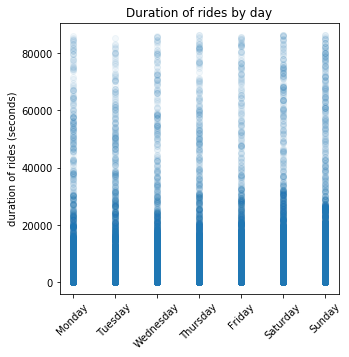

In [17]:
# duration and day

plt.figure(figsize = [5, 5])

plt.scatter(data = df, x = 'day', y = 'duration_sec', alpha = 0.05)
plt.title('Duration of rides by day')
plt.xlabel('')
plt.ylabel('duration of rides (seconds)')
plt.xticks(rotation=45)
ax = plt.gca() #https://stackoverflow.com/questions/47492783/how-to-stop-pyplot-from-reversing-the-values-in-my-x-axis
ax.invert_xaxis()
plt.show();

Saturday seems to be a more popular day for longer rides, but there doesn't seem to be a huge difference between days.

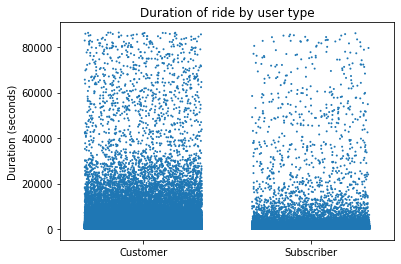

In [19]:
#sb plot to use jitter #http://alanpryorjr.com/visualizations/seaborn/stripplot/stripplot/

p = sb.stripplot(data = df, x = 'user_type', y = 'duration_sec', jitter = 0.35, color = base_colour, size=2)
plt.title('Duration of ride by user type')
plt.xlabel('')
plt.ylabel('Duration (seconds)');

More of the longer rides seem to be from customers rather than subscribers. In fact, it looks like the most interesting insights could come from variables related to timings of the rides. To look at this information more closely, the start time variable will be changed to datetime format and new columns will be added to the dataframe to indicate day and month of the rides.

#### Overview of bivariate analysis

Longer rides appear to be more common in August and September. This makes sense as the weather is likely to be good. Unexpected result for June, perhaps due to data collection.

Saturday seems to be a more popular day for longer rides, but there doesn't seem to be a huge difference between days.

More of the longer rides seem to be from customers rather than subscribers.

## Multivariate analysis

This section will examine the relationship between duration and month and day in more depth by adding a third feature into the analysis: user type.

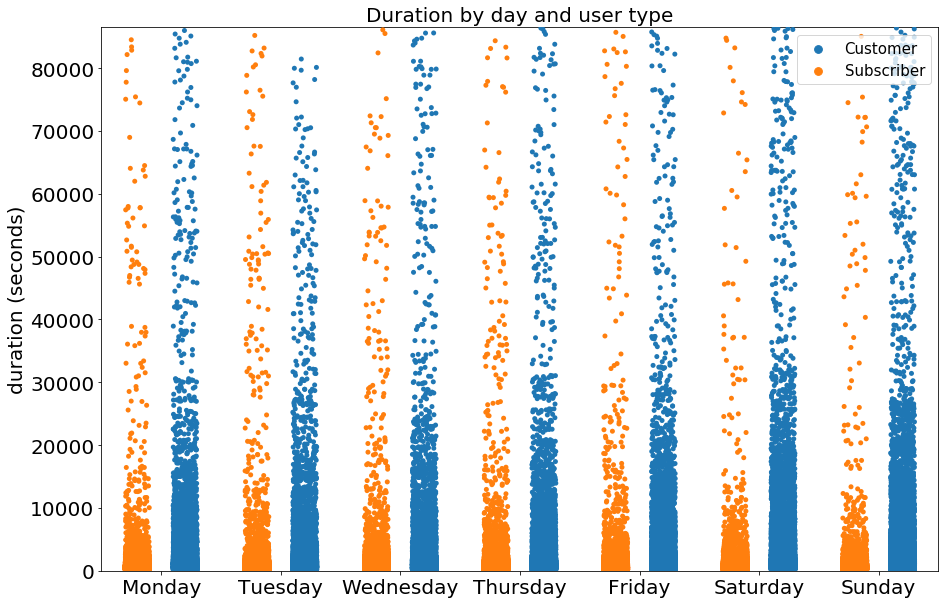

In [22]:
#for explanatory presentation, make the chart easier to understand by placing user types next to each other and adding jitter
#https://knowledge.udacity.com/questions/159800

#day

plt.figure(figsize=[15, 10])
sb.stripplot(data = df, x = 'day', y = 'duration_sec', hue = 'user_type',
            jitter = 0.2, dodge = True);

plt.ylim(0, 86500)
plt.title('Duration by day and user type', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);
plt.ylabel('duration (seconds)', fontsize = 20)
plt.xlabel('')
plt.legend(fontsize = 15, loc = 'upper right')
ax = plt.gca() #https://stackoverflow.com/questions/47492783/how-to-stop-pyplot-from-reversing-the-values-in-my-x-axis
ax.invert_xaxis()
plt.show();

Shorter rides are most popular among both types of user, across all days. Length of ride seems fairly consistent across all days for subscribers, while customers seem to have longer rides on the weekend.

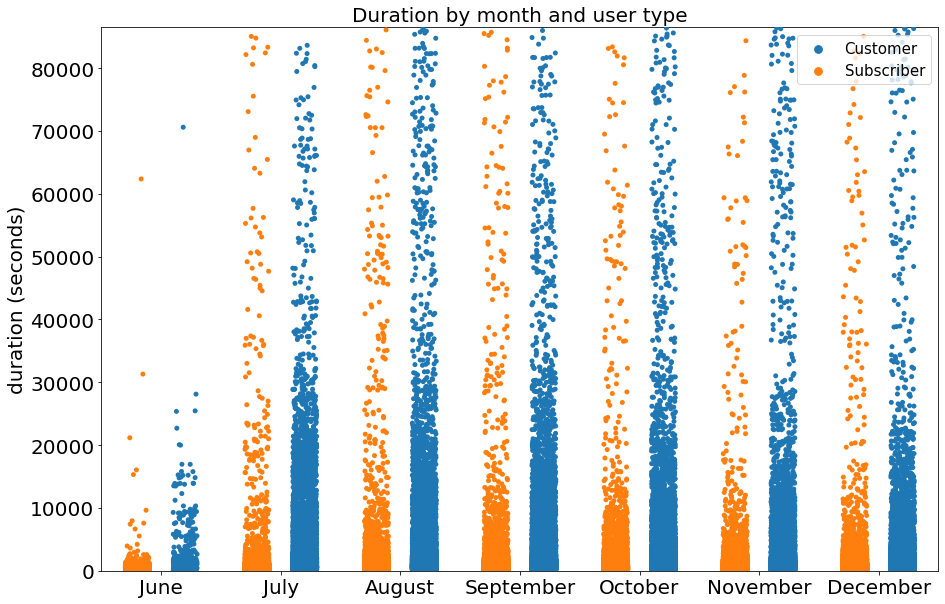

In [23]:
#month
#https://knowledge.udacity.com/questions/159800

plt.figure(figsize=[15, 10])
sb.stripplot(data = df, x = 'month', y = 'duration_sec', hue = 'user_type',
            jitter = 0.2, dodge = True);

plt.ylim(0, 86500)
plt.title('Duration by month and user type', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);
plt.ylabel('duration (seconds)', fontsize = 20)
plt.xlabel('')
plt.legend(fontsize = 15, loc = 'upper right')
ax = plt.gca() #https://stackoverflow.com/questions/47492783/how-to-stop-pyplot-from-reversing-the-values-in-my-x-axis
ax.invert_xaxis()
plt.show();

Unusual information for June. Perhaps this data is incomplete or there was a problem with GoBike during that month. This would require further analysis.

Ride duration is fairly consistent across months, especially for subscribers, apart from June and July which are lower for subscribers. The relative consistency makes sense if the bikes are used for commuting, which happens year-round. It is reassuring to see that the bikes get somewhat consistent usage throughout the year. September and August are particularly high in duration for customers. June and December are lower. Apart from the June result, these make sense in terms of expected weather at these times of year.

#### Overview of multivariate analysis

The multivariate analysis was useful to see a more nuanced interpretation of factors that influence duration of rides. It was useful to see how duration differs depending on user type at different times of the year or week.

The June data is surprising and would require further investigation. It is also surprising that the duration of rides among both groups, is not too inconsistent across the year. We might expect it to reduce dramatically in colder months, especially among customers who are less likely to be using the service to commute.